# Feedforward Neural Network

In multinomial classification problems, logistic regression is usually applied with linear features.

$
\hat{y} = f(W^Tx) = f(w_0x_0 + w_1x_1 +...+ w_nx_n), \text{where $f(z) = \frac{1}{1 + e^{-z}}$}
$

But this model is not sufficient to fit many complex datasets.
One way to increase the efficiency of logistic regression is to introduce more non-linear features to the logistic regression.

eg.
$
\hat{y} = f(W^Tx) = f(w_0x_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_3 x^{2}_1x_2 + w_4 x^{3}_1x_2 + ....)
$


But it is not a good solution, as the model may overfit the dataset.
Also, additional non-linear features lead to more features to the model and cause computation complexity.

This problem can be resolved with Deep Feedforward Neural Network, where each layer of the network solves some part of the classification

### Fashion MNIST Dataset with Feedforward Neural Network


### Load Dataset

In [3]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

from tensorflow.examples.tutorials.mnist import input_data

# load data
data = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


### Define Variables and Placeholders


In [4]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
B1 = tf.Variable(tf.zeros([200]))

W2 = tf.Variable(tf.truncated_normal([200, 60], stddev=0.1))
B2 = tf.Variable(tf.zeros([60]))

W3 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
B3 = tf.Variable(tf.zeros([30]))

W4 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))
B4 = tf.Variable(tf.zeros([10]))


### Neural Network Model

Unlike linear models, the non-linearity of Neural Network causes it cost function to become non-convex.
Therefore, gradient descent does not guarantee convergence.

It is sensitive to the initial parameter values. Therefore, weights in Neural Network should be initialize with small random values.

The bias values may initialize with zero or small positive numbers.




In [25]:
Y1 = tf.nn.sigmoid(tf.matmul(x, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
y_hat = tf.nn.softmax(tf.matmul(Y3, W4) + B4)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=y)
cost = tf.reduce_mean(cross_entropy)


learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, "float"))

### Model Training

The following are the main steps in the algorithm, which is called backpropagation training algorithm.

- For each training instance $x^{(i)}$ 

- Forward pass, compute prediction, $\hat{y}$
    
- Compute cost
    
- Backward pass, go through each layer in reverse to measure the error contribution from each connection
    
- Tweak the connection weights to reduce error

#### Backpropagation 

Consider a neural network which has 3 output neuron, $O1$, $O2$ and $O3$

For each training instance:
- Ouput neurons, $O1$, $O2$ and $O3$, result $out_{O1}$, $out_{O2}$ and $out_{O3}$ respectively.
- Calculate the error for each output nodes, $E_{O1}$, $E_{O2}$, and $E_{O3}$
- So, the total error is, $ E_{total} = E_{O1} + E_{O2} + E_{O3}$
- Now consider only the output node $O1$, which has sigmoid activation function, $f(z)$ where $z = w_k.a_k + b_k$
- $w_k$ affect on total error is, $\frac{E_{total}}{\partial w_k}$
- $\frac{\partial E_{total}}{\partial w_k} = \frac{\partial E_{total}}{\partial out_{O1}} .  \frac{\partial out_{O1}}{\partial z} . \frac{\partial z}{\partial w_k} $ 
- $\frac{\partial E_{total}}{\partial out_{O1}}$ is known
- $\frac{\partial out_{O1}}{\partial z} = out_{O1} (1 - out_{O1})$ as $out_{O1} = \frac{1}{1 + e^{-z}}$
- $\frac{\partial z}{\partial w_k} = a_k$ as $z = w_k.a_k + b_k$
- So that $\frac{E_{total}}{\partial w_k}$ can be measured and update next value of $w_k$ as, $w_k = w_k - \alpha \frac{\partial E_{total}}{\partial w_k}$
- In similar way backpropagation calculate the new values for weights in previous layers


In [5]:
def plotCost(itrs, costs):
    plt.figure(figsize=(16,5))
    plt.plot(np.squeeze(costs), color='#2A688B')
    plt.xlim(0, itrs-1)
    plt.ylabel("cost")
    plt.xlabel("iterations")
    plt.show()

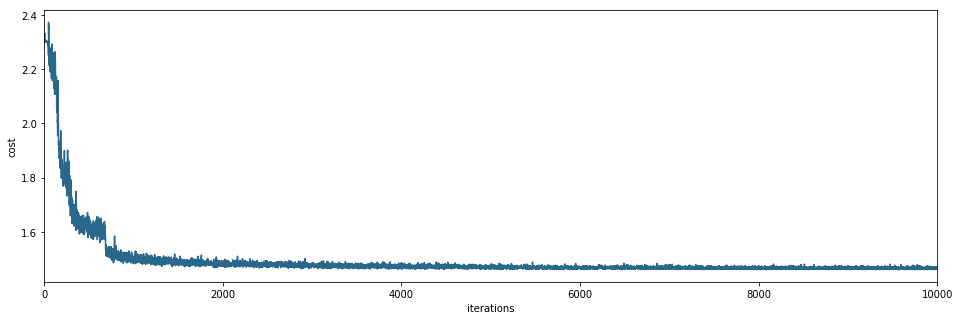

('Train Accuracy:', 0.99523634)
('Test Accuracy:', 0.978)


In [27]:
   
def train(debug):
    costs = []
    itrs = 10000
    init = tf.global_variables_initializer()
    
    with tf.Session() as session:
        session.run(init)
        
        for i in range(itrs):
            batch_xs, batch_ys = data.train.next_batch(500)
            
            _, batch_cost = session.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
            costs.append(batch_cost)
            
            if debug:
                print("Cost after batch {batch}: {cost}".format(batch=i, cost=batch_cost))
        

        plotCost(itrs, costs)
        
        print("Train Accuracy:", session.run(accuracy, feed_dict={x: data.train.images, y: data.train.labels}))
        print("Test Accuracy:", session.run(accuracy, feed_dict={x: data.test.images, y: data.test.labels}))

train(False)

### Regularization and Tuning
In previous result, we see test accuracy of 0.99, which is a sign of overfitting.

`dropout` and `learning rate decay` are regularization techniques to avoid overfitting.



In [6]:
pkeep = tf.placeholder(tf.float32)

Y1 = tf.nn.sigmoid(tf.matmul(x, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.sigmoid(tf.matmul(Y1d, W2) + B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
y_hat = tf.nn.softmax(tf.matmul(Y3, W4) + B4)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=y)
cost = tf.reduce_mean(cross_entropy)

global_step = tf.Variable(0, trainable=False)
learning_rate_start = 0.1
learning_rate = tf.train.exponential_decay(learning_rate_start, global_step,
                                             5000, 0.96, staircase=True)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, "float"))



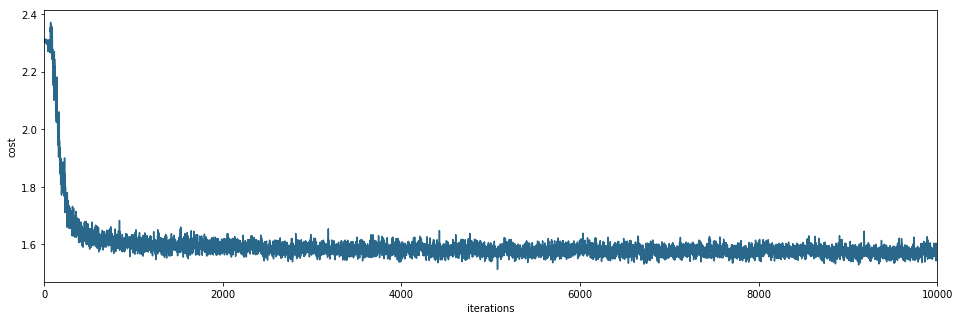

('Train Accuracy:', 0.88545454)
('Test Accuracy:', 0.933)


In [7]:
def train_with_dropout(debug):
    dropout = 0.25
    nodropout = 1.0
    costs = []
    itrs = 10000
    init = tf.global_variables_initializer()
    
    with tf.Session() as session:
        session.run(init)
        
        for i in range(itrs):
            batch_xs, batch_ys = data.train.next_batch(500)
            
            _, batch_cost = session.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys, pkeep: dropout})
            costs.append(batch_cost)
            
            if debug:
                print("Cost after batch {batch}: {cost}".format(batch=i, cost=batch_cost))
        

        plotCost(itrs, costs)
        
        print("Train Accuracy:", session.run(accuracy, feed_dict={x: data.train.images, y: data.train.labels, pkeep: dropout}))
        print("Test Accuracy:", session.run(accuracy, feed_dict={x: data.test.images, y: data.test.labels, pkeep: nodropout}))

train_with_dropout(False)

### Adam Optimizer

Adam optimizer offers several advantages over the Gradient Descent algorithm.
Adam uses a larger effective step size without fine tuning.


In [13]:
pkeep = tf.placeholder(tf.float32)

Y1 = tf.nn.sigmoid(tf.matmul(x, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.sigmoid(tf.matmul(Y1d, W2) + B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
y_hat = tf.nn.softmax(tf.matmul(Y3, W4) + B4)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=y)
cost = tf.reduce_mean(cross_entropy)

global_step = tf.Variable(0, trainable=False)
learning_rate_start = 0.01
learning_rate = tf.train.exponential_decay(learning_rate_start, global_step,
                                             5000, 0.96, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, "float"))

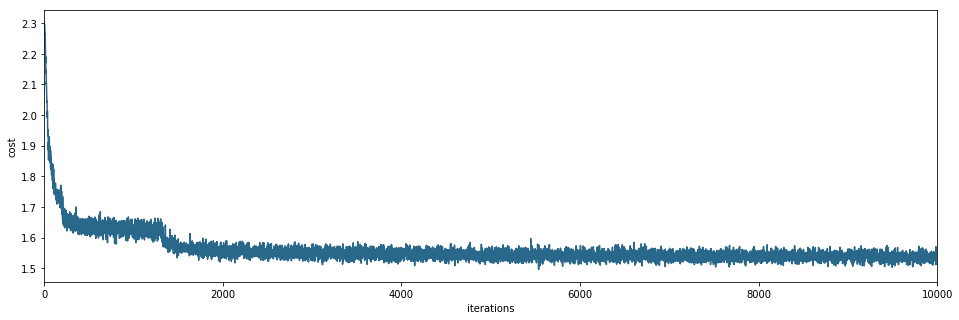

('Train Accuracy:', 0.92267275)
('Test Accuracy:', 0.9517)


In [14]:
train_with_dropout(False)
